In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [44]:
def data_preprocessor(file_path):
    df = pd.read_excel(file_path, sheet_name='Data 1')
    df = df.loc[2:]
    df=df.rename(columns={'Back to Contents':'Date','Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)':'price'})
    df['Date']= pd.to_datetime(df['Date'])
    df['Price']= pd.to_numeric(df['price'])
    df['Years']= df.Date.dt.strftime("%Y") # Year Extraction
    df['Months']= df.Date.dt.strftime("%B") # month extraction
    return df

In [45]:
df = data_preprocessor('RBRTEd.xls')

In [46]:
df

Date  price  Price Years Months
2    1987-05-20  18.63  18.63  1987    May
3    1987-05-21  18.45  18.45  1987    May
4    1987-05-22  18.55  18.55  1987    May
5    1987-05-25   18.6  18.60  1987    May
6    1987-05-26  18.63  18.63  1987    May
...         ...    ...    ...   ...    ...
9158 2023-06-20  75.79  75.79  2023   June
9159 2023-06-21  76.92  76.92  2023   June
9160 2023-06-22  73.93  73.93  2023   June
9161 2023-06-23  73.56  73.56  2023   June
9162 2023-06-26  73.86  73.86  2023   June

[9161 rows x 5 columns]

In [47]:
#df=df.set_index('Date')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9161 entries, 2 to 9162
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9161 non-null   datetime64[ns]
 1   price   9161 non-null   object        
 2   Price   9161 non-null   float64       
 3   Years   9161 non-null   object        
 4   Months  9161 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 358.0+ KB


In [49]:
#checking for null values
df.isna().sum()

Date      0
price     0
Price     0
Years     0
Months    0
dtype: int64

In [50]:
# checking for duplicate values
df.duplicated().sum()

0

In [51]:
df.price.skew()

0.7215485370607028

In [52]:
df.price.kurt()

-0.6780832766926226

In [53]:
df.price.median()

40.45

In [54]:
df.describe()

Date        Price
count                           9161  9161.000000
mean   2005-05-30 06:05:08.874577024    48.948246
min              1987-05-20 00:00:00     9.100000
25%              1996-05-16 00:00:00    19.150000
50%              2005-05-19 00:00:00    40.450000
75%              2014-06-19 00:00:00    71.620000
max              2023-06-26 00:00:00   143.950000
std                              NaN    32.852682

---

In [55]:
fig = px.line(data_frame=df,x='Date',y='Price',title="Crude Oil Prices over the years.",
              color_discrete_sequence=['#810955'])
fig.update_layout(
    autosize=True,     
    width=750,
    height=400,
    margin=dict(
        l=5,
        r=10,
        b=15,
        t=50,
        pad=4),
    xaxis=dict(showgrid=False),   #disabling grids
    yaxis=dict(showgrid=False),
    plot_bgcolor='#f5e1e1',       #setting bgcolor
    paper_bgcolor="#FAF2F2",      #setting plotbg color
    title_x=0.4,                  #adjusting title
    title_font=dict(              #working with font
            family="Helvetica",
            size=20,
            color='#810955'
        ))
fig.update_xaxes(color='#810955') #alterations on xaxes
fig.update_yaxes(color='#810955') #alterations on yaxes
fig.show()

In [56]:
fig = px.line(data_frame=df,x='Date',y='Price',title="Crude Oil Prices over the years[with time_span slider]",
              color_discrete_sequence=['#810955'])
fig.update_xaxes(rangeslider_visible=True) #alterations on xaxes
fig.show()

In [57]:
fig = px.line(data_frame=df,x='Date',y='Price',title="Crude Oil Prices over the years[Interactive Chart]",
              color_discrete_sequence=['#810955'])
fig.update_xaxes(rangeslider_visible=True,
                rangeselector=dict(
                buttons=list([
                    dict(count=1,label="1m",step='month',stepmode='backward'),
                    dict(count=2,label="1y",step="year",stepmode='backward'),
                    dict(count=3,label="2y",step='year',stepmode='backward'),
                    dict(step='all')
                ])))

In [60]:
fig=px.bar(data_frame=df.groupby(by='Years')['Price'].mean(),title="Average crude oil Prices for Each year",
              color_discrete_sequence=['#810955'])
fig.update_xaxes(tickangle=270)
fig.update_xaxes(color='#810955') 
fig.update_yaxes(color='#810955')
fig.show()

In [61]:
fig=px.bar(data_frame=df.groupby(by='Months')['Price'].mean(),title="Average crude oil Prices for Each Month",
              color_discrete_sequence=['#810955'])
fig.update_xaxes(tickangle=270)
fig.update_xaxes(color='#810955') 
fig.update_yaxes(color='#810955')
fig.show()

## Box Plots for understanding the spread of data.

In [62]:
fig = px.box(data_frame=df,x='Years',y='Price',title="Boxplots of Each year.",
              color_discrete_sequence=['#810955'])
fig.update_layout(plot_bgcolor='#F1FFF1',
                  paper_bgcolor='#C4F0C5')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [63]:
fig = px.box(data_frame=df,x='Months',y='Price',title="Boxplots of Each Month.",
              color_discrete_sequence=['#233714'])
fig.update_layout(plot_bgcolor='#F1FFF1',
                  paper_bgcolor='#C4F0C5')
fig.show()

## Heat map.

In [64]:
fig= px.density_heatmap(df,x='Years',y='Months',z='Price',histfunc='avg',template='seaborn',
                        title="Heatmap")
fig.update_layout(paper_bgcolor="#FFDEDE")
fig.show()

In [65]:
#pivot = pd.pivot_table(df,values='price',index='years',columns='months',aggfunc="mean",fill_value=0)
fig= px.density_heatmap(df,x='Years',y='Months',z='Price',histfunc='avg',template='seaborn',
                        text_auto=True,title="Detailed Heatmap with Range selector")
fig.update_layout(plot_bgcolor='#FFDEDE',     
                    paper_bgcolor="#FFDEDE")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

## ACF AND PACF Plots

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
import plotly.graph_objects as go

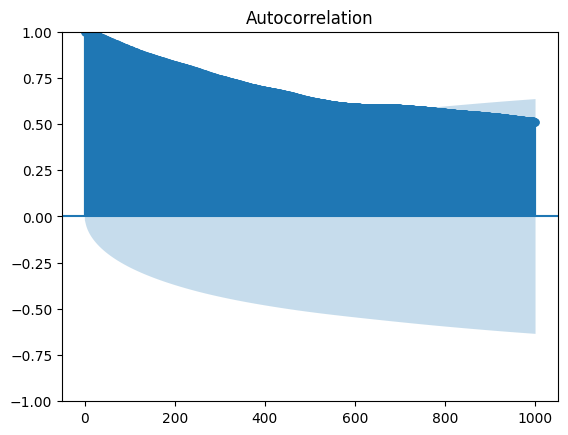

In [71]:
acf_plot = tsa_plots.plot_acf(df.Price, lags=1000)

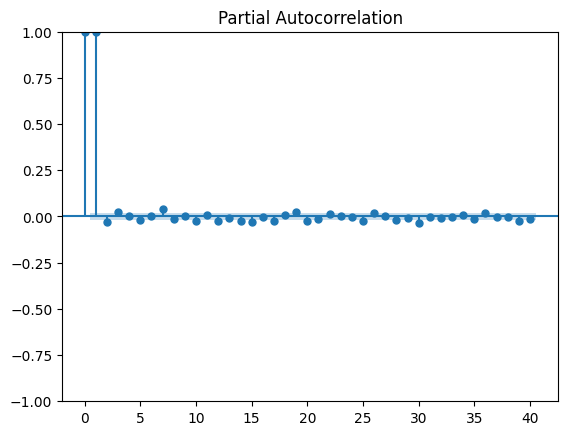

In [72]:
pacf_plot = tsa_plots.plot_pacf(df.Price,method='ywm')

In [73]:

def create_corr_plot(series, plot_pacf=False):
    corr_array = tsa_plots.pacf(series.dropna(), alpha=0.05) if tsa_plots.plot_pacf else tsa_plots.acf(series.dropna(), alpha=0.05)
    lower_y = corr_array[1][:,0] - corr_array[0]
    upper_y = corr_array[1][:,1] - corr_array[0]

    fig = go.Figure()
    [fig.add_scatter(x=(x,x), y=(0,corr_array[0][x]), mode='lines',line_color='#3f3f3f') 
     for x in range(len(corr_array[0]))]
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=corr_array[0], mode='markers', marker_color='#1f77b4',
                   marker_size=12)
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=upper_y, mode='lines', line_color='rgba(255,255,255,0)')
    fig.add_scatter(x=np.arange(len(corr_array[0])), y=lower_y, mode='lines',fillcolor='rgba(32, 146, 230,0.3)',
            fill='tonexty', line_color='rgba(255,255,255,0)')
    fig.update_traces(showlegend=False)
    fig.update_xaxes(range=[-1,42])
    fig.update_yaxes(zerolinecolor='#000000')
    
    title='Partial Autocorrelation (PACF)' if plot_pacf else 'Autocorrelation (ACF)'
    fig.update_layout(title=title)
    fig.show()

In [74]:
a=create_corr_plot(df.rice,plot_pacf=True)

# Moving Average

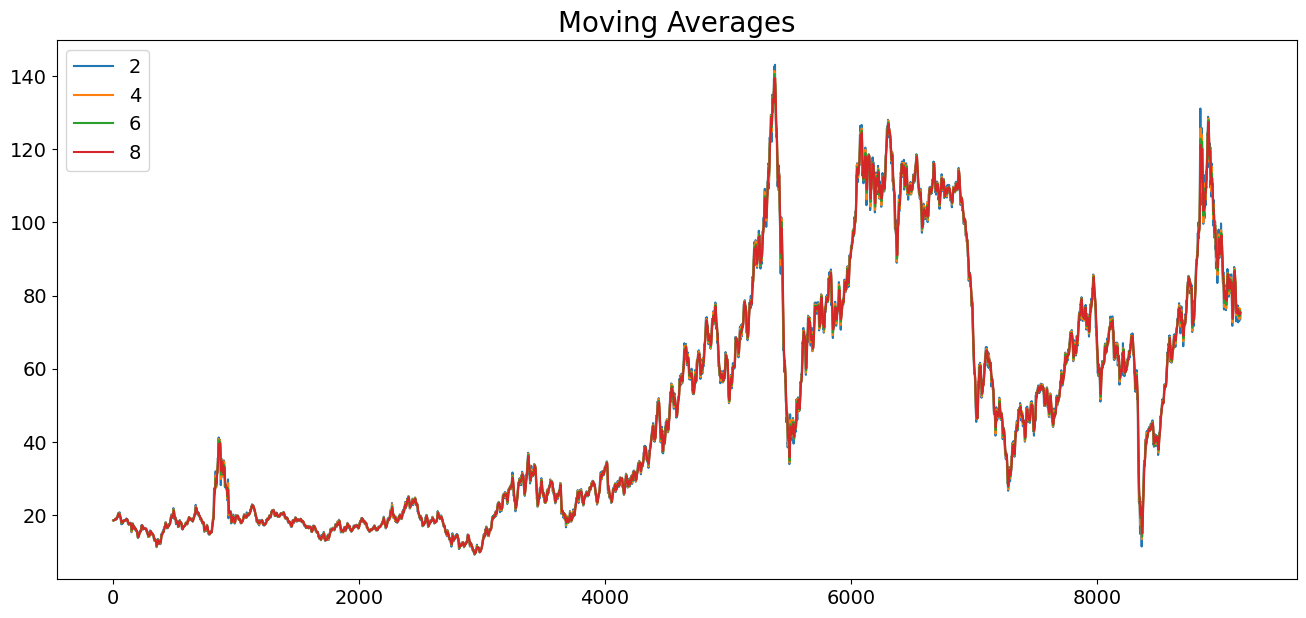

In [75]:
for i in range(2,10,2):
    df["price"].rolling(i).mean().plot(label=str(i),figsize=(16,7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("Moving Averages",fontsize=20)
plt.legend(loc='best',fontsize=(14));

---